<a href="https://colab.research.google.com/github/v5v5/StepikMLService/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D1%8B_%D0%B0%D0%B2%D0%B8%D0%B0%D0%BA%D0%BE%D0%BC%D0%BF%D0%B0%D0%BD%D0%B8%D0%B8_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/clients.csv")

In [ ]:
# df.head(3)
# df.sample(3)
df.shape
# df.info()

(129880, 24)

# Алгоритм исследования
## Исследуем значения satisfaction
Отобразим значения satisfaction.

In [ ]:
df[['satisfaction']].value_counts(dropna=False)

satisfaction           
neutral or dissatisfied    58879
satisfied                  45025
-                          25976
dtype: int64

In [ ]:
df[['satisfaction']].value_counts(dropna=False, normalize=True)

satisfaction           
neutral or dissatisfied    0.453334
satisfied                  0.346666
-                          0.200000
dtype: float64

Убедимся, что там три значения 'satisfied', 'neutral or dissatisfied' и '-'.
Т.к. значение '-' невозможно интерпретировать, то примем решение, что строки со значениями '-' нужно выбросить из исследуемой таблицы. Это сделаем в конце исселодвательского анализа.

In [ ]:
df = df[~df['satisfaction'].isin(['-'])]
df.shape

(103904, 24)

Переменная принимает только два нечисловых значения, значит это задача классификации.
## Исследуем значения Gender

In [ ]:
df[['Gender']].value_counts(dropna=False, normalize=True)

Gender
Female    0.506140
Male      0.491357
NaN       0.002502
dtype: float64

Значения содержат NaN. Подсчитаем количество NaN. Можно сделать вывод, что их очень мало, поэтому эти строки из таблицы можно выбросить.
## Исследуем значения Age

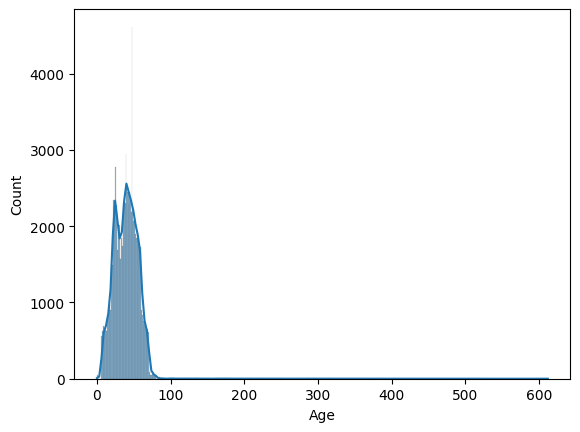

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.show()

Значения содержат некорректные данные, т.к. возраст содержит > 150 лет, что невозможно. Подберем экспериментально допустимое значение возраста - примерно 0.3% перцентиль.

In [ ]:
age_ok = df['Age'].quantile(0.997)
age_ok

105.07399999999325

Видим, что 0.3% можно считать корректными. Строки, которые больше этого значения можно отбросить из таблицы. Это сделаем в конце исселодвательского анализа.

In [ ]:
df.drop(df[df['Age'] > 105].index, inplace=True)

## Исследуем Customer Type

In [ ]:
df[['Customer Type']].value_counts(dropna=False, normalize=True)

Customer Type    
Loyal Customer       0.816841
disloyal Customer    0.182551
NaN                  0.000608
dtype: float64

Значения содержат NaN. Подсчитаем количество NaN. Можно сделать вывод, что их очень мало, поэтому эти строки из таблицы можно выбросить. Это сделаем в конце исселодвательского анализа.
## Исследуем Type of Travel

In [ ]:
df[['Type of Travel']].value_counts(dropna=False, normalize=True)

Type of Travel 
Business travel    0.688879
Personal Travel    0.310272
NaN                0.000849
dtype: float64

Значения содержат NaN. Подсчитаем количество NaN. Можно сделать вывод, что их очень мало, поэтому эти строки из таблицы можно выбросить. Это сделаем в конце исселодвательского анализа.
## Исследуем Class

In [ ]:
df[['Class']].value_counts(dropna=False, normalize=True)

Class   
Business    0.477436
Eco         0.449654
Eco Plus    0.072051
NaN         0.000859
dtype: float64

Значения содержат NaN. Подсчитаем количество NaN. Можно сделать вывод, что их очень мало, поэтому эти строки из таблицы можно выбросить. Это сделаем в конце исселодвательского анализа.
## Исследуем Flight Distance

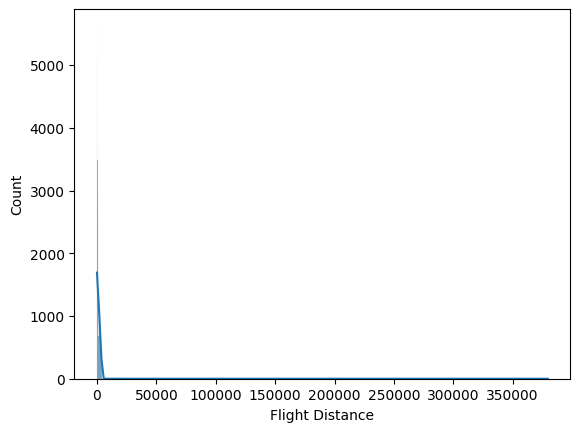

In [ ]:
sns.histplot(df['Flight Distance'], kde=True)
plt.show()

Значения содержат некорректные данные, т.к. дистанция > 24901 миль, что невозможно, т.к. это длина экватора. Подберем экспериментально допустимое значение дистанции - примерно 0.2 перцентиль.


In [ ]:
distance_ok = df['Flight Distance'].quantile(0.998)
distance_ok

4963.0

Увидим, что 0.3% можно считать корректными. Строки, которые больше этого значения можно отбросить из таблицы. Это сделаем в конце исселодвательского анализа.

In [ ]:
df.drop(df[df['Flight Distance'] > 4963.0].index, inplace=True)

## Исследуем Departure Delay in Minutes

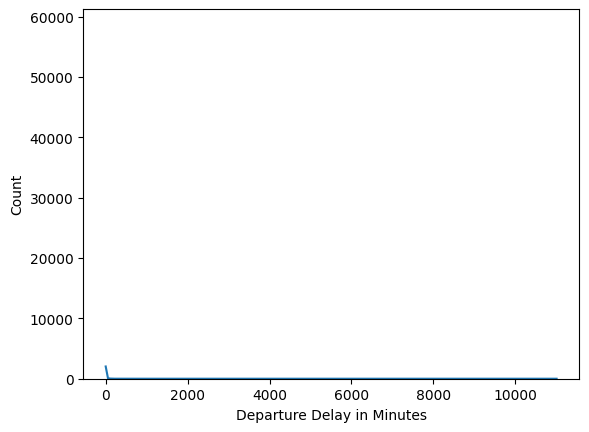

In [ ]:
sns.histplot(df['Departure Delay in Minutes'], kde=True)
plt.show()

Значения содержат некорректные данные, т.к. время > 20000 минут, что невозможно, т.к. это 333 часа. Подберем экспериментально допустимое значение задержки - примерно 0.2 перцентиль.

In [ ]:
departue_delay_ok = df['Departure Delay in Minutes'].quantile(0.998)
departue_delay_ok

336.0

Увидим, что 0.2% можно считать корректными. Строки, которые больше этого значения можно отбросить из таблицы. Это сделаем в конце исселодвательского анализа.

In [ ]:
df.drop(df[df['Departure Delay in Minutes'] > 336.0].index, inplace=True)

## Исследуем Arrival Delay in Minutes

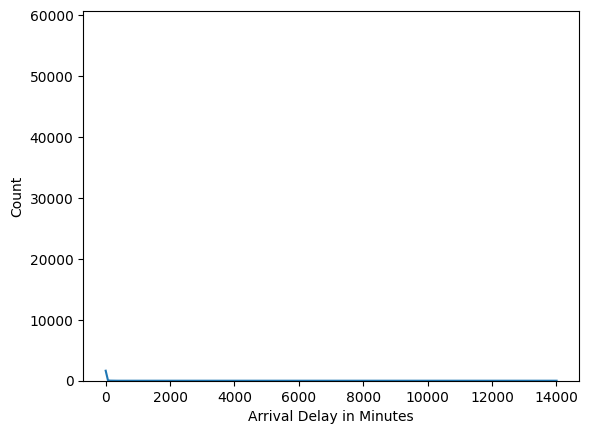

In [ ]:
sns.histplot(df['Arrival Delay in Minutes'], kde=True)
plt.show()

Значения содержат некорректные данные, т.к. время > 14000 минут, что невозможно, т.к. это 233 часа. Подберем экспериментально допустимое значение задержки - примерно 0.2 перцентиль.

In [ ]:
arrival_delay_ok = df['Arrival Delay in Minutes'].quantile(0.998)
arrival_delay_ok

284.0

Увидим, что 0.2% можно считать корректными. Строки, которые больше этого значения можно отбросить из таблицы. Это сделаем в конце исселодвательского анализа.

In [ ]:
df.drop(df[df['Arrival Delay in Minutes'] > 284.0].index, inplace=True)

## Исследуем признаки:
- Inflight wifi service
- Departure/Arrival time convenient
- Ease of Online booking
- Gate location
- Food and drink
- Online boarding
- Seat comfort
- Inflight entertainment
- On-board service
- Leg room service
- Baggage handling
- Checkin service
- Inflight service
- Cleanliness
Подсчитаем количество значений нецелевых оценок вне диапазона

In [ ]:
params = [
'Inflight wifi service',
'Departure/Arrival time convenient',
'Ease of Online booking',
'Gate location',
'Food and drink',
'Online boarding',
'Seat comfort',
'Inflight entertainment',
'On-board service',
'Leg room service',
'Baggage handling',
'Checkin service',
'Inflight service',
'Cleanliness'
]

for p in params:
  print(len(df[(df[p] < 1) | (df[p] > 5)])/len(df)*100)

3.0177687154092627
5.142246820079619
4.346053014855811
0.03204194581998252
0.1136032624526653
2.3837265753956696
0.03204194581998252
0.03592581804058647
0.029129041654529564
0.49422274007185163
0.025245169433925622
0.03495484998543548
0.03592581804058647
0.036896786095737454


Во всех категориях нецелевых оценок равно или меньше 5%, поэтому их можно отбросить из таблицы

In [ ]:
for p in params:
  df.loc[(df[p] < 1) | (df[p] > 5)] = np.nan

In [ ]:
df = df.dropna()

In [ ]:
# df.head(3)
# df.sample(3)
df.shape
# df.info()

(92801, 24)

Подсчитаем количество и %-ое соотношение отброшенных строк в сравнении с оригинальной таблицой

In [ ]:
# было строк 129880
# стало строк 92801
(129880 - 92801)/129880*100

28.548660301817065

## Преобразуем категориальные переменные Gender, Customer Type, Type of Travel, Class в числовые

In [ ]:
gender = pd.get_dummies(df['Gender'], prefix='Gender')
gender.sample(3)

,Gender_Female,Gender_Male
68394,1,0
119227,1,0
56932,0,1


In [ ]:
customer_type = pd.get_dummies(df['Customer Type'], prefix='Customer Type')
customer_type.sample(3)

,Customer Type_Loyal Customer,Customer Type_disloyal Customer
21964,1,0
84315,1,0
43985,1,0


In [ ]:
type_of_travel = pd.get_dummies(df['Type of Travel'], prefix='Type of Travel')
type_of_travel.sample(3)

,Type of Travel_Business travel,Type of Travel_Personal Travel
102533,0,1
112580,1,0
116288,0,1


In [ ]:
type_of_class = pd.get_dummies(df['Class'], prefix='Class')
type_of_class.sample(3)

,Class_Business,Class_Eco,Class_Eco Plus
3287,0,1,0
100056,0,1,0
52335,1,0,0


## Добавим новые преобразованные значения в исследуемую таблицу

In [ ]:
new_df = pd.concat([df, gender], axis=1)
new_df = pd.concat([new_df, customer_type], axis=1)
new_df = pd.concat([new_df, type_of_travel], axis=1)
new_df = pd.concat([new_df, type_of_class], axis=1)

## Отбросим все Gender, Customer Type, Type of Travel, Class категориальные переменные из таблицы и нецелевые признаки и целевой признак

In [ ]:
remove_columns = [
    'Gender',
    'Customer Type',
    'Type of Travel',
    'Class',
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness',
    'satisfaction',
]
X = new_df.drop(remove_columns, axis = 1)
y = new_df['satisfaction']

## Применим логистическую регрессию для обучения модели satisfaction = f(parameteres)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[10268,  2978],
       [ 5527,  4428]])